In [1]:
import nltk
import requests # a simplified module for accessing web content
import os
import bs4

In [2]:
requestsObj = requests.get("http://www.gutenberg.org/files/2147/2147-0.txt")
requestsObj.status_code == requests.codes.ok # if True, then we are good to go!

True

In [3]:
gfile = open("data/goldbug.txt", "wb")
for chunk in requestsObj.iter_content(1000000): 
    #writing the file as bytes, one million at a time
    gfile.write(chunk)

gfile.close()


In [4]:
poeString = open("data/goldbug.txt","r", encoding="utf-8").read() #opening it as utf-8

In [5]:
len(poeString)

541108

In [6]:
start = poeString.find("THE GOLD-BUG")
end = poeString.find("FOUR BEASTS IN ONE")
goldBugString = poeString[start:end]
directory = "data"
if not os.path.exists(directory):
     os.makedirs(directory)
with open("data/goldbug.txt", "w") as f:
     f.write(goldBugString)
with open("data/goldBug.txt", "r") as f:
     goldBugString = f.read()


In [7]:
goldBugWordTokens = nltk.word_tokenize(goldBugString)


In [8]:
goldBugWordTokens = [word for word in goldBugWordTokens if word[0].isalpha()]
goldBugWordTokensLowercase = [word.lower() for word in goldBugWordTokens]


In [9]:
print("Number of lowercase matches: ", goldBugString.count("bug"))
print("Number of uppercase matches: ", goldBugString.count("BUG"))
print("Number of converted lowercase matches: ", goldBugString.lower().count("bug"))

Number of lowercase matches:  37
Number of uppercase matches:  1
Number of converted lowercase matches:  38


In [10]:
exampleBugSentence = "These bugs are bugging me said the bug."
exampleBugSentence.count("bug")


3

In [11]:
import re
bugMatches = re.compile("bug\w*", re.I).findall(goldBugString)
print("Number of matches ", len(bugMatches))
print("Variant forms: ",set(bugMatches))

Number of matches  38
Variant forms:  {'BUG', 'bug', 'bugs'}


In [12]:
bugTokens = [word for word in goldBugWordTokens if "bug" in
word.lower()]
print("Number of matches ", len(bugMatches))
print("Variant forms: ",set(bugMatches))


Number of matches  38
Variant forms:  {'BUG', 'bug', 'bugs'}


In [13]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print("bug: ", stemmer.stem("bug"))
print("bugs: ", stemmer.stem("bugs"))
print("buggging: ", stemmer.stem("bugging"))
print("baking: ", stemmer.stem("baking"))
print("bakery: ", stemmer.stem("bakery"))
print("bakeries: ", stemmer.stem("bakeries"))


bug:  bug
bugs:  bug
buggging:  bug
baking:  bake
bakery:  bakeri
bakeries:  bakeri


In [14]:
from nltk.stem import WordNetLemmatizer
wn1 = WordNetLemmatizer()
print("bug:", wn1.lemmatize("bug"))
print("bugs:", wn1.lemmatize("bugs"))
print("bugging:", wn1.lemmatize("bugging"))
print("baking:", wn1.lemmatize("baking"))
print("bakery:", wn1.lemmatize("bakeries"))
print("bakeries:", wn1.lemmatize("bakeries"))


bug: bug
bugs: bug
bugging: bugging
baking: baking
bakery: bakery
bakeries: bakery


In [15]:
print("baking:", wn1.lemmatize("baking"))
print("baking:", wn1.lemmatize("baking", pos="v"))

baking: baking
baking: bake


In [16]:
goldBugLemmas = [wn1.lemmatize(word) for word in goldBugWordTokens]
print("Count of 'bug' in tokens: ", goldBugWordTokens.count("bug"))
print("Count of 'bugs' in tokens: ", goldBugWordTokens.count("bugs"))
print("Count of 'bug' in lemmas: ", goldBugLemmas.count("bug"))
print("Count of 'eye' in tokens: ", goldBugWordTokens.count("eye"))
print("Count of 'eye' in lemmas: ", goldBugLemmas.count("eye"))


Count of 'bug' in tokens:  29
Count of 'bugs' in tokens:  0
Count of 'bug' in lemmas:  29
Count of 'eye' in tokens:  20
Count of 'eye' in lemmas:  28


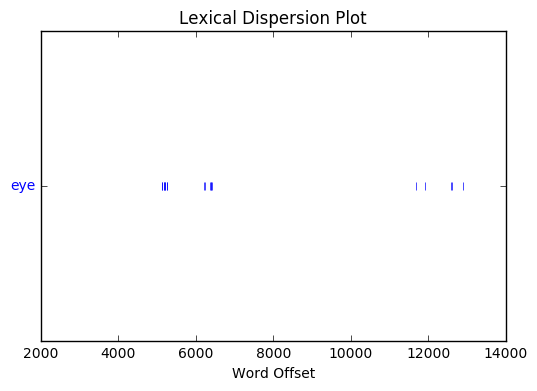

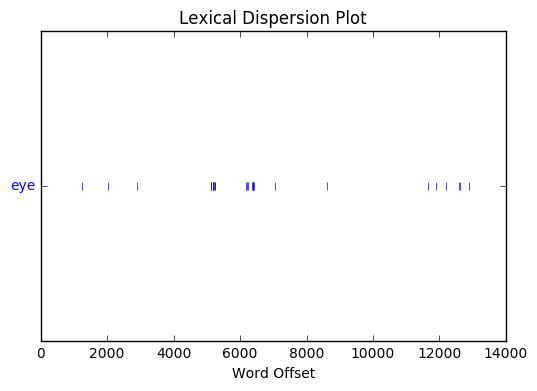

In [17]:
%matplotlib inline
nltk.Text(goldBugWordTokens).dispersion_plot(["eye"])
nltk.Text(goldBugLemmas).dispersion_plot(["eye"])


In [18]:
from nltk.corpus import wordnet as wn
wn.synsets("bug")


[Synset('bug.n.01'),
 Synset('bug.n.02'),
 Synset('bug.n.03'),
 Synset('hemipterous_insect.n.01'),
 Synset('microbe.n.01'),
 Synset('tease.v.01'),
 Synset('wiretap.v.01')]

In [19]:
wn.synsets("bug",pos="n")


[Synset('bug.n.01'),
 Synset('bug.n.02'),
 Synset('bug.n.03'),
 Synset('hemipterous_insect.n.01'),
 Synset('microbe.n.01')]

In [20]:
for synset in wn.synsets("bug", pos="n"):
     print(synset.name(), ": ", synset.definition())

bug.n.01 :  general term for any insect or similar creeping or crawling invertebrate
bug.n.02 :  a fault or defect in a computer program, system, or machine
bug.n.03 :  a small hidden microphone; for listening secretly
hemipterous_insect.n.01 :  insects with sucking mouthparts and forewings thickened and leathery at the base; usually show incomplete metamorphosis
microbe.n.01 :  a minute life form (especially a disease-causing bacterium); the term is not in technical use


In [21]:
bugSynset = wn.synset("bug.n.01")
print(bugSynset.definition())



general term for any insect or similar creeping or crawling invertebrate


In [22]:
bugSynset.hypernyms()

[Synset('insect.n.01')]

In [23]:
bugHypernym = wn.synset("insect.n.01")
print(bugHypernym, bugHypernym.definition())


Synset('insect.n.01') small air-breathing arthropod


In [24]:
bugHypernym.hyponyms()

[Synset('beetle.n.01'),
 Synset('bird_louse.n.01'),
 Synset('bug.n.01'),
 Synset('collembolan.n.01'),
 Synset('defoliator.n.01'),
 Synset('dictyopterous_insect.n.01'),
 Synset('dipterous_insect.n.01'),
 Synset('earwig.n.01'),
 Synset('ephemerid.n.01'),
 Synset('ephemeron.n.01'),
 Synset('flea.n.01'),
 Synset('gallfly.n.03'),
 Synset('hemipterous_insect.n.01'),
 Synset('heteropterous_insect.n.01'),
 Synset('holometabola.n.01'),
 Synset('homopterous_insect.n.01'),
 Synset('hymenopterous_insect.n.01'),
 Synset('imago.n.02'),
 Synset('leaf_miner.n.01'),
 Synset('lepidopterous_insect.n.01'),
 Synset('louse.n.01'),
 Synset('mecopteran.n.01'),
 Synset('neuropteron.n.01'),
 Synset('odonate.n.01'),
 Synset('orthopterous_insect.n.01'),
 Synset('phasmid.n.01'),
 Synset('pollinator.n.01'),
 Synset('proturan.n.01'),
 Synset('psocopterous_insect.n.01'),
 Synset('pupa.n.01'),
 Synset('queen.n.01'),
 Synset('social_insect.n.01'),
 Synset('stonefly.n.01'),
 Synset('termite.n.01'),
 Synset('thysanopter.

In [25]:
insectHyponymsTricky = sorted(set([l.name() for s in
bugHypernym.closure(lambda s:s.hyponyms())for l in s.lemmas()]))
print(insectHyponymsTricky[-50:]) #peek at last 50


['tusser', 'tussock_moth', 'tussore', 'tussur', 'two-spotted_ladybug', 'two-winged_insects', 'tzetze', 'tzetze_fly', 'underwing', 'vedalia', 'velvet_ant', 'vespid', 'vespid_wasp', 'viceroy', 'vinegar_fly', 'walking_leaf', 'walking_stick', 'walkingstick', 'warble_fly', 'wasp', 'water_beetle', 'water_boatman', 'water_bug', 'water_scorpion', 'water_skater', 'water_strider', 'wax_insect', 'wax_moth', 'web_spinner', 'webbing_clothes_moth', 'webbing_moth', 'webworm_moth', 'weevil', 'wheel_bug', 'whirligig_beetle', 'white-faced_hornet', 'white_admiral', 'white_ant', 'whitefly', 'wood_ant', 'woolly_adelgid', 'woolly_alder_aphid', 'woolly_aphid', 'woolly_apple_aphid', 'woolly_plant_louse', 'worker', 'worker_bee', 'yellow-fever_mosquito', 'yellow_hornet', 'yellow_jacket']


In [26]:
def collect_hyponym_lemma_names(synset, hyponym_names):
     for hyponym in synset.hyponyms(): #go through this synset's hyponyms
         for lemma in hyponym.lemmas(): #go through each hyponym's lemma
             hyponym_names.append(lemma.name()) # this hyponym's hyponyms

In [27]:
insect_hyponym_names = []
collect_hyponym_lemma_names(bugHypernym, insect_hyponym_names)
insect_hyponym_names = sorted(set(insect_hyponym_names))
print(insect_hyponym_names)


['beetle', 'bird_louse', 'biting_louse', 'bug', 'collembolan', 'defoliator', 'dictyopterous_insect', 'dipteran', 'dipteron', 'dipterous_insect', 'earwig', 'ephemeral', 'ephemerid', 'ephemeron', 'ephemeropteran', 'flea', 'gallfly', 'hemipteran', 'hemipteron', 'hemipterous_insect', 'heteropterous_insect', 'holometabola', 'homopteran', 'homopterous_insect', 'hymenopter', 'hymenopteran', 'hymenopteron', 'hymenopterous_insect', 'imago', 'leaf-miner', 'leaf_miner', 'lepidopteran', 'lepidopteron', 'lepidopterous_insect', 'louse', 'mecopteran', 'metabola', 'neuropteran', 'neuropteron', 'neuropterous_insect', 'odonate', 'orthopteran', 'orthopteron', 'orthopterous_insect', 'phasmid', 'phasmid_insect', 'plecopteran', 'pollinator', 'proturan', 'psocopterous_insect', 'pupa', 'queen', 'social_insect', 'springtail', 'stone_fly', 'stonefly', 'sucking_louse', 'telsontail', 'termite', 'thysanopter', 'thysanopteron', 'thysanopterous_insect', 'thysanuran_insect', 'thysanuron', 'trichopteran', 'trichoptero

In [28]:
def get_hyponym_names_from_hypernym(synset):
     names = []
     for hypernym in synset.hypernyms():
         collect_hyponym_lemma_names(hypernym, names)
     return sorted(set(names))
bug_hypernym_hyponyms = get_hyponym_names_from_hypernym(bugSynset)
print(bugSynset, "has", len(bug_hypernym_hyponyms), "hyponyms")


Synset('bug.n.01') has 71 hyponyms


In [29]:
goldBugText = nltk.Text(goldBugLemmas)
goldBugText.concordance("beetle",100)
bugRelatedWords = list(set([word for word in goldBugLemmas if word in insect_hyponym_names]))
bugRelatedWords

Displaying 21 of 21 matches:
 you are no artist I must wait until I see the beetle itself if I am to form any idea of it personal
 humor puzzled me and a for the drawing of the beetle there were positively no antennæ visible and t
 then that your master wa really bitten by the beetle and that the bite made him sick do n’t tink no
ith a grave and stately air and brought me the beetle from a glass case in which it wa enclosed It w
one when I had completed my examination of the beetle sent for you that I might have your counsel an
 replied do you mean to say that this infernal beetle ha any connection with your expedition into th
ll you which way to go and here stop take this beetle with you.” bug Massa Will de goole bug cried t
ike you to take hold of a harmless little dead beetle why you can carry it up by this string but if 
e such nonsense a that As sure a you drop that beetle I’ll break your neck Look here Jupiter do you 
limb a far a you think safe and not let go the beetle I’ll mak

['bug', 'beetle']

In [30]:
goldBugText = nltk.Text(goldBugLemmas)
goldBugText.concordance("beetle", 100)

Displaying 21 of 21 matches:
 you are no artist I must wait until I see the beetle itself if I am to form any idea of it personal
 humor puzzled me and a for the drawing of the beetle there were positively no antennæ visible and t
 then that your master wa really bitten by the beetle and that the bite made him sick do n’t tink no
ith a grave and stately air and brought me the beetle from a glass case in which it wa enclosed It w
one when I had completed my examination of the beetle sent for you that I might have your counsel an
 replied do you mean to say that this infernal beetle ha any connection with your expedition into th
ll you which way to go and here stop take this beetle with you.” bug Massa Will de goole bug cried t
ike you to take hold of a harmless little dead beetle why you can carry it up by this string but if 
e such nonsense a that As sure a you drop that beetle I’ll break your neck Look here Jupiter do you 
limb a far a you think safe and not let go the beetle I’ll mak

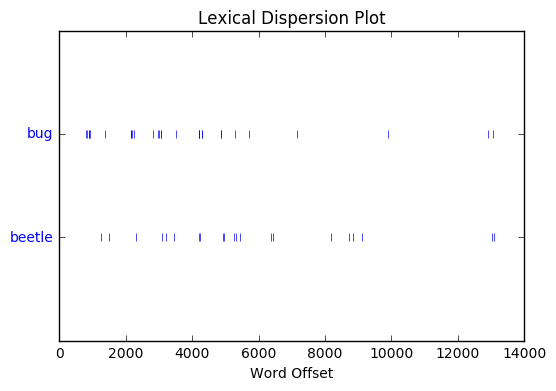

In [31]:
goldBugText.dispersion_plot(bugRelatedWords)

In [32]:
goldBugText = nltk.Text(goldBugLemmas)
goldBugText.concordance("beetle",100)


Displaying 21 of 21 matches:
 you are no artist I must wait until I see the beetle itself if I am to form any idea of it personal
 humor puzzled me and a for the drawing of the beetle there were positively no antennæ visible and t
 then that your master wa really bitten by the beetle and that the bite made him sick do n’t tink no
ith a grave and stately air and brought me the beetle from a glass case in which it wa enclosed It w
one when I had completed my examination of the beetle sent for you that I might have your counsel an
 replied do you mean to say that this infernal beetle ha any connection with your expedition into th
ll you which way to go and here stop take this beetle with you.” bug Massa Will de goole bug cried t
ike you to take hold of a harmless little dead beetle why you can carry it up by this string but if 
e such nonsense a that As sure a you drop that beetle I’ll break your neck Look here Jupiter do you 
limb a far a you think safe and not let go the beetle I’ll mak

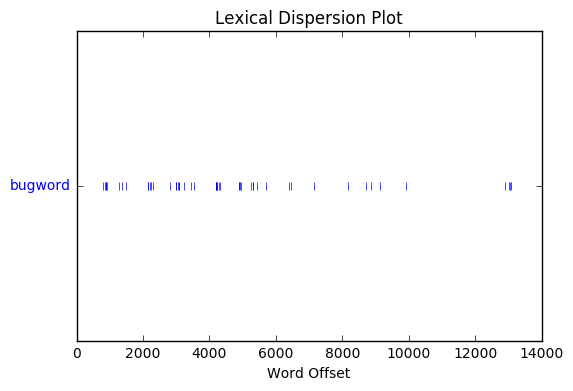

In [33]:
goldBugLemmasForBugs = ["bugword" if word in bugRelatedWords else word for word in goldBugLemmas]
goldBugTextForBugs = nltk.Text(goldBugLemmasForBugs)
goldBugTextForBugs.dispersion_plot(["bugword"]) 

In [34]:
print(goldBugLemmasForBugs.count("bugword"),goldBugWordTokens.count("bug"))
goldBugLemmasForBugs.count("bugword") * 100 / goldBugWordTokens.count("bug")
goldBugLemmasForBugs.count("beetle") * 100 / goldBugWordTokens.count("bug")


50 29


0.0

In [35]:
goldBugTextForBugs.similar("bugword")
goldBugTextForBugs.similar("beetle")

scarabæus word tree peg skull spade hut parchment treasure pit period
kind boat if distance island year line solution half
No matches


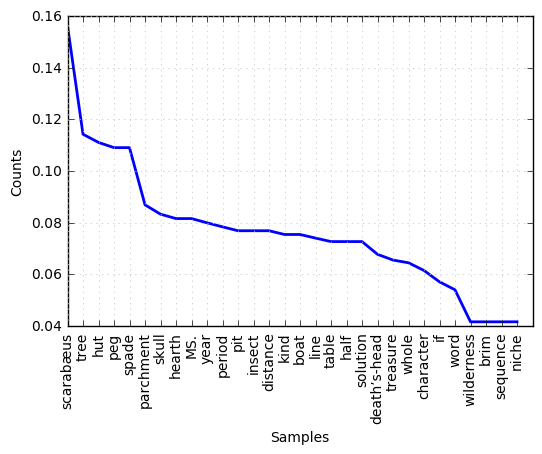

In [36]:
goldBugContextIndex = nltk.text.ContextIndex(goldBugLemmasForBugs)
goldBugBugSimilarities = goldBugContextIndex.word_similarity_dict("bugword")
#but we don't actually want our bug words in the list


del goldBugBugSimilarities["bugword"]


#copy the dictionary into the FreqDist
goldBugBugSimilaritiesFreqs = nltk.FreqDist(goldBugBugSimilarities)
goldBugBugSimilaritiesFreqs.plot(30)

In [37]:
goldBugTagged = nltk.pos_tag(goldBugWordTokens)

In [38]:
goldBugTagged[:22]

[('THE', 'DT'),
 ('GOLD-BUG', 'NNP'),
 ('What', 'WP'),
 ('ho', 'VBD'),
 ('what', 'WP'),
 ('ho', 'NN'),
 ('this', 'DT'),
 ('fellow', 'NN'),
 ('is', 'VBZ'),
 ('dancing', 'VBG'),
 ('mad', 'NN'),
 ('He', 'PRP'),
 ('hath', 'VBD'),
 ('been', 'VBN'),
 ('bitten', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('Tarantula', 'NNP'),
 ('All', 'NNP'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('Wrong._', 'NNP')]

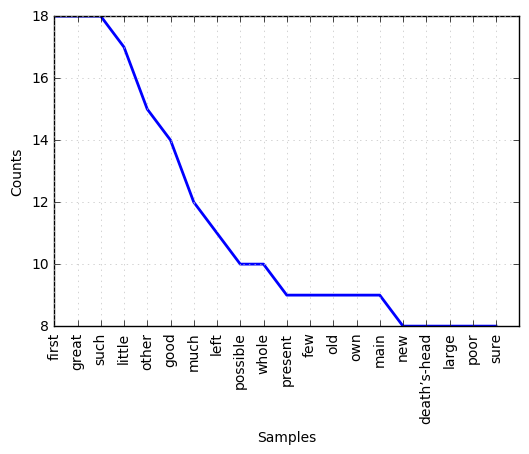

In [39]:
%matplotlib inline
goldBugAdjectives = [token for token, pos in goldBugTagged if "JJ" == pos]
goldBugAdjectivesFreqs = nltk.FreqDist(goldBugAdjectives)
goldBugAdjectivesFreqs.plot(20)

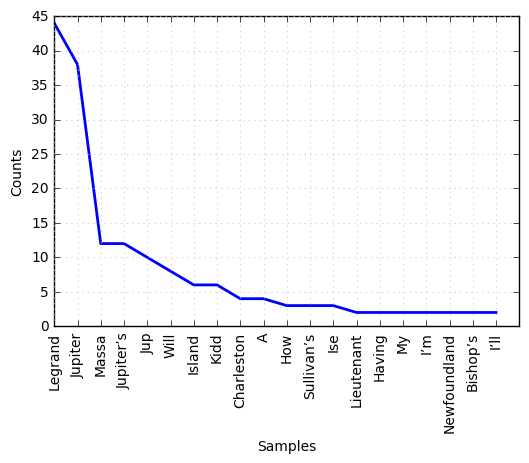

In [40]:
goldBugProperNouns = [token for token, pos in goldBugTagged if "NNP" in pos]
nltk.FreqDist(goldBugProperNouns).plot(20)

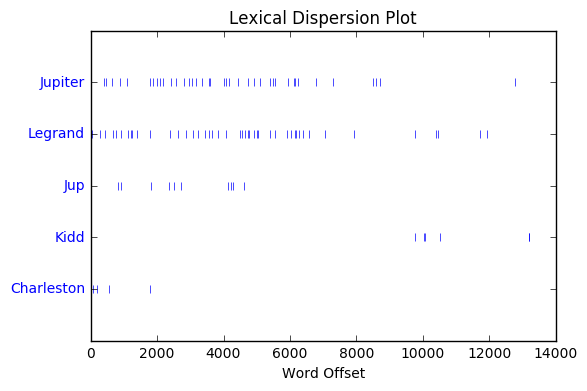

In [41]:
goldBugText = nltk.Text(goldBugWordTokens)
goldBugText.dispersion_plot(["Jupiter", "Legrand", "Jup","Kidd","Charleston"])

  NN   IN   DT  PRP   JJ  VBD   RB   VB   CC  NNS  VBN   TO  NNP PRP$  VBP  VBG  VBZ   MD   CD   FW 
2103 1819 1553 1069  958  813  787  521  489  435  384  326  273  263  251  210  170  169  106  104 


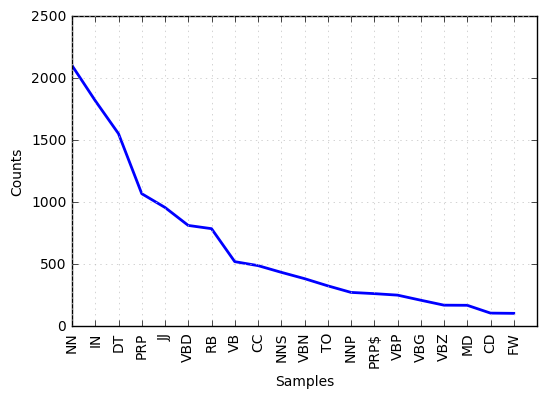

In [42]:
goldBugTags = [pos for word, pos in goldBugTagged]
goldBugTagsFreqs = nltk.FreqDist(goldBugTags)
goldBugTagsFreqs.tabulate(20)
goldBugTagsFreqs.plot(20)

  NN   IN   DT  PRP   JJ  VBD   RB   VB   CC  NNS  VBN   TO  NNP PRP$  VBP  VBG  VBZ   MD   CD   FW 
2103 1819 1553 1069  958  813  787  521  489  435  384  326  273  263  251  210  170  169  106  104 


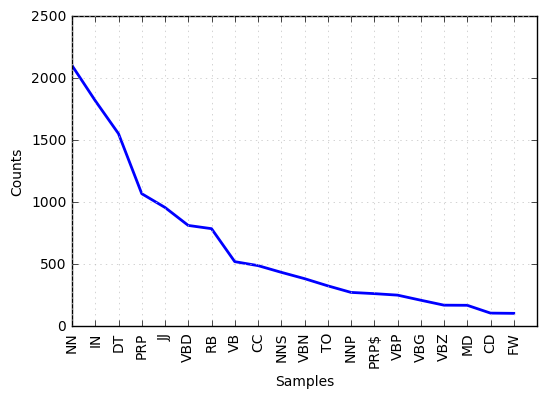

In [43]:
goldBugTags = [pos for word, pos in goldBugTagged]
goldBugTagsFreqs = nltk.FreqDist(goldBugTags)
goldBugTagsFreqs.tabulate(20)
goldBugTagsFreqs.plot(20)

In [44]:
goldBugTagsNormalizedPunc = [pos if pos.isalpha() else "." for pos in goldBugTags]
nltk.FreqDist(goldBugTagsNormalizedPunc).tabulate(20)

  NN   IN   DT  PRP   JJ  VBD   RB   VB   CC  NNS  VBN   TO  NNP    .  VBP  VBG  VBZ   MD   CD   FW 
2103 1819 1553 1069  958  813  787  521  489  435  384  326  273  265  251  210  170  169  106  104 


In [45]:
goldBugTagsNormalized = [pos[0:2] if pos.isalpha() else "." for pos in goldBugTags]
goldbugTagsNormalizedFreqs = nltk.FreqDist(goldBugTagsNormalized)
goldbugTagsNormalizedFreqs.tabulate(20)

  NN   VB   IN   DT   PR   JJ   RB   CC   TO    .   MD   CD   FW   WD   WR   WP   RP   EX   PD   UH 
2813 2349 1819 1553 1069 1022  822  489  326  265  169  106  104   98   89   70   45   30   13    1 


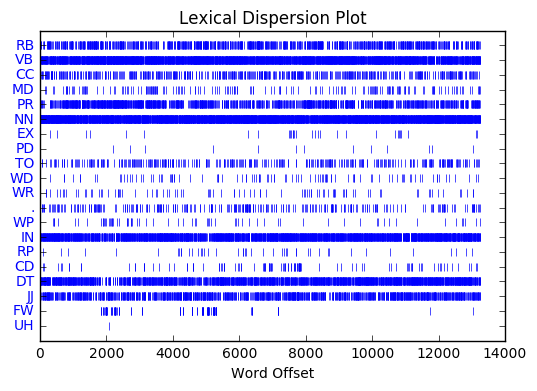

In [46]:
#nltk.text(goldBugTagsNormalized).dispersion_plot (list(goldbugTagsNormalizedFreqs.keys()))

nltk.Text(goldBugTagsNormalized).dispersion_plot(list(goldbugTagsNormalizedFreqs.keys()))

In [47]:
print(goldBugTagged[12900:13055])

[('the', 'DT'), ('left', 'JJ'), ('eye', 'NN'), ('of', 'IN'), ('the', 'DT'), ('skull.”', 'NN'), ('This', 'DT'), ('mistake', 'NN'), ('made', 'VBD'), ('a', 'DT'), ('difference', 'NN'), ('of', 'IN'), ('about', 'IN'), ('two', 'CD'), ('inches', 'NNS'), ('and', 'CC'), ('a', 'DT'), ('half', 'NN'), ('in', 'IN'), ('the', 'DT'), ('that', 'WDT'), ('is', 'VBZ'), ('to', 'TO'), ('say', 'VB'), ('in', 'IN'), ('the', 'DT'), ('position', 'NN'), ('of', 'IN'), ('the', 'DT'), ('peg', 'NN'), ('nearest', 'IN'), ('the', 'DT'), ('tree', 'NN'), ('and', 'CC'), ('had', 'VBD'), ('the', 'DT'), ('treasure', 'NN'), ('been', 'VBN'), ('beneath', 'IN'), ('the', 'DT'), ('the', 'DT'), ('error', 'NN'), ('would', 'MD'), ('have', 'VB'), ('been', 'VBN'), ('of', 'IN'), ('little', 'JJ'), ('moment', 'NN'), ('but', 'CC'), ('shot', 'NN'), ('together', 'RB'), ('with', 'IN'), ('the', 'DT'), ('nearest', 'JJS'), ('point', 'NN'), ('of', 'IN'), ('the', 'DT'), ('tree', 'NN'), ('were', 'VBD'), ('merely', 'RB'), ('two', 'CD'), ('points', 'N

In [48]:
theGoat = goldBugString.find("the goat")
print(goldBugString[theGoat-100:theGoat+300])

nspection. The following characters were rudely traced, in a red
tint, between the death’s-head and the goat:

  “53‡‡†305))6*;4826)4‡)4‡);806*;48†8¶60))85;1‡);:‡
  *8†83(88)5*†;46(;88*96*?;8)*‡(;485);5*†2:*‡(;4956*
  2(5*--4)8¶8*;4069285);)6†8)4‡‡;1(‡9;48081;8:8‡1;4
  8†85;4)485†528806*81(‡9;48;(88;4(‡?34;48)4‡;161;:
  188;‡?;”

“But,” said I, returning him the slip, “I am as much in the dark as



In [54]:
goldBugTaggedNormalized=[(word,pos[0:2] if pos.isalpha()else".")for word, pos in goldBugTagged]

In [58]:
goldBugTagsNormalized=set([pos for word,pos in goldBugTaggedNormalized])
print(len(goldBugTaggedNormalized))

13252


In [61]:
goldBugTagsNormalizedAndFiltered=[]
for currentpos in goldBugTagsNormalized:
    freqs=nltk.FreqDist([word.lower()for word,pos in goldBugTaggedNormalized if currentpos==pos])
    if len(freqs)>2 and currentpos!=".":
        goldBugTagsNormalizedAndFiltered.append(currentpos)

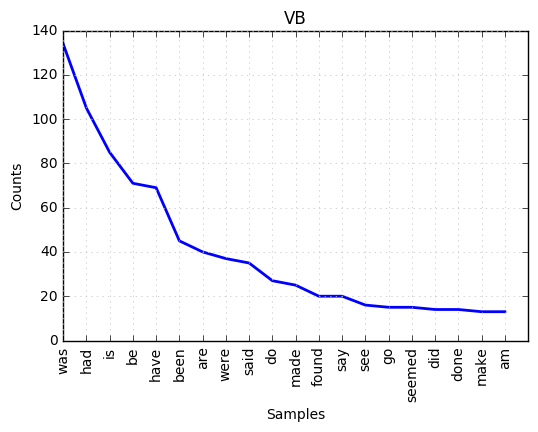

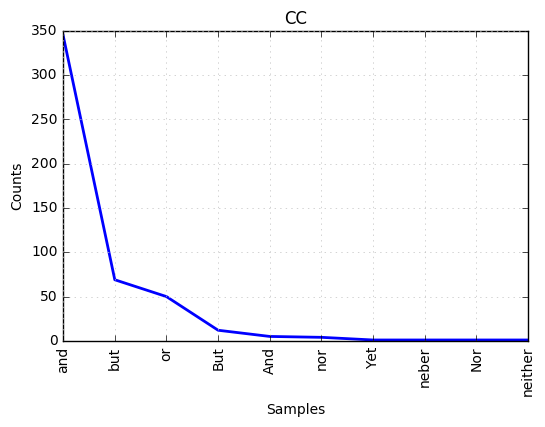

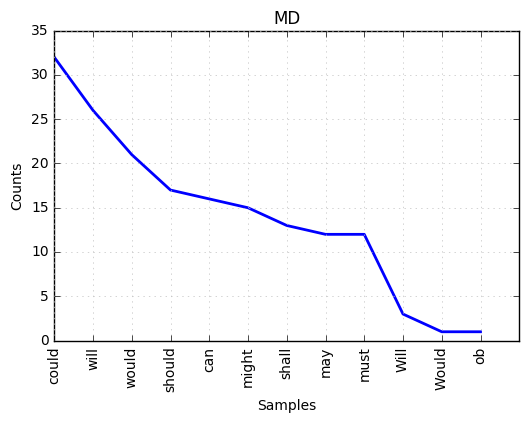

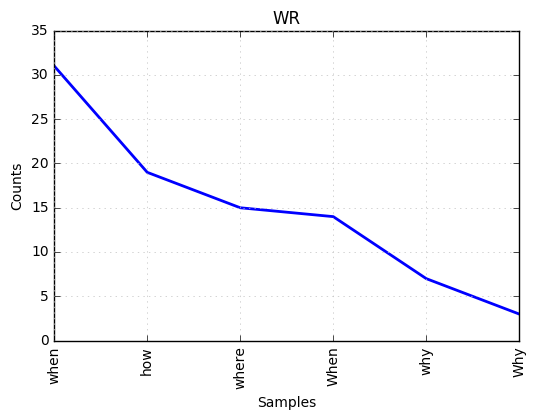

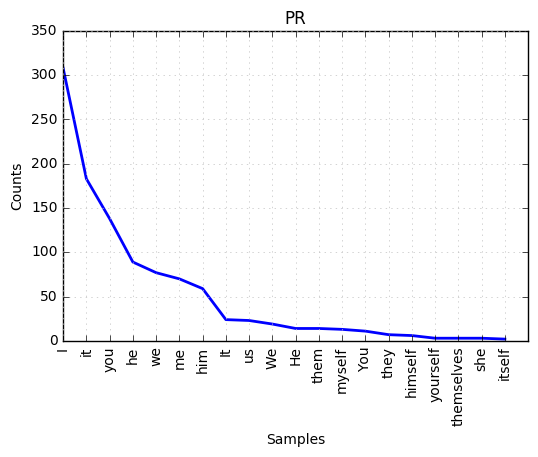

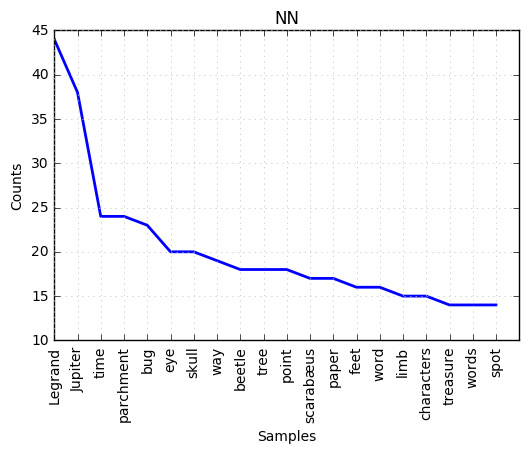

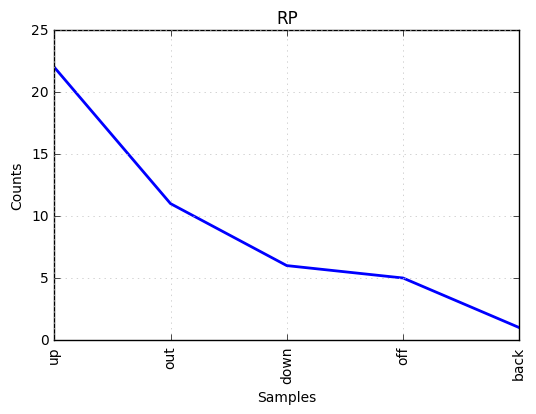

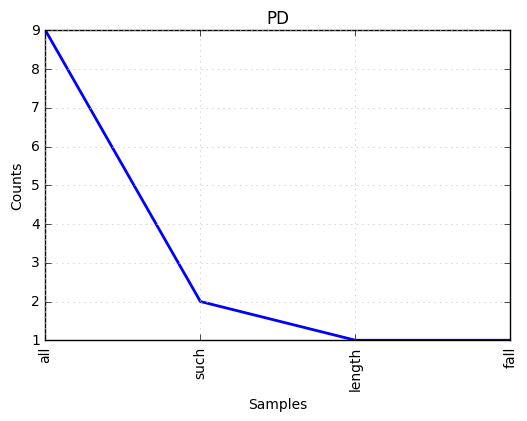

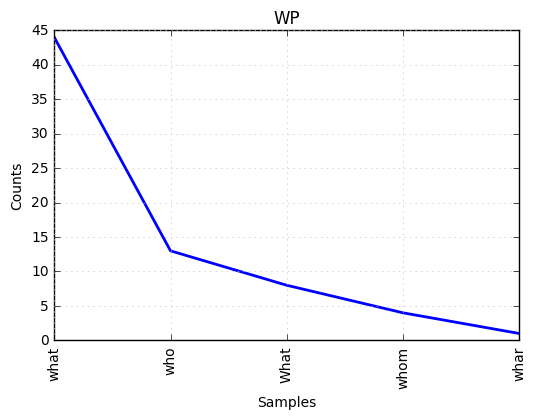

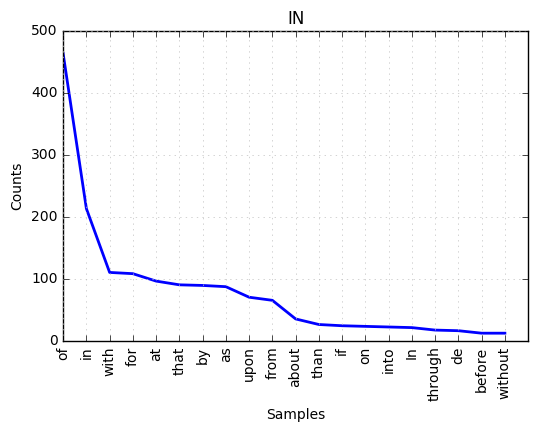

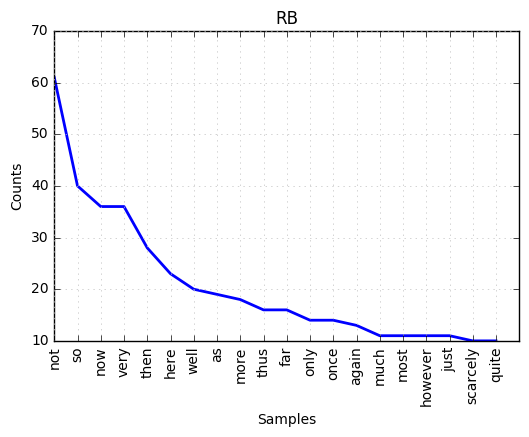

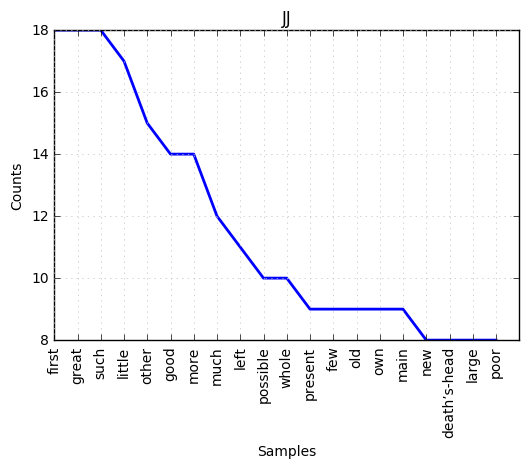

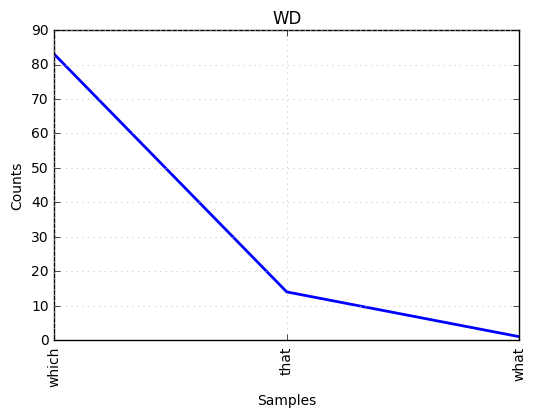

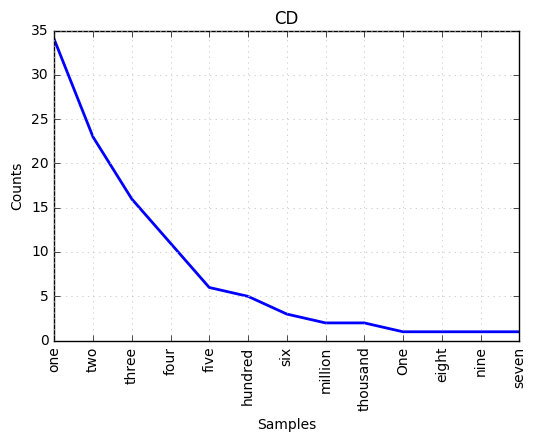

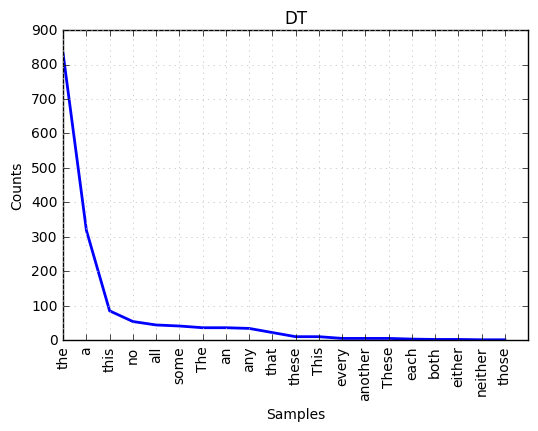

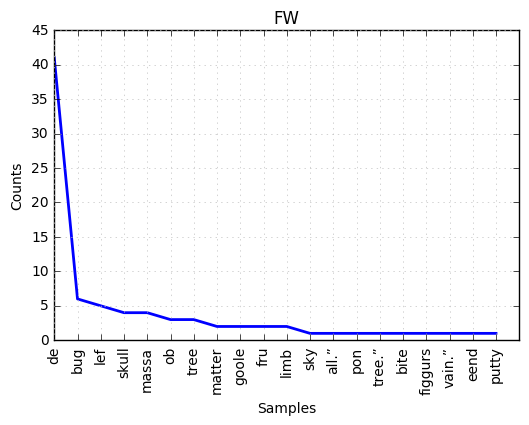

In [67]:
for currentpos in goldBugTagsNormalizedAndFiltered:
        words=[word for word,pos in goldBugTaggedNormalized if pos == currentpos]
        freqs=nltk.FreqDist(words)
        freqs.plot(20, title=currentpos)


In [68]:
import math
goldBugTagsGridRows = math.ceil(len(goldBugTagsNormalizedAndFiltered)/4)
goldBugTagsGridRows

4

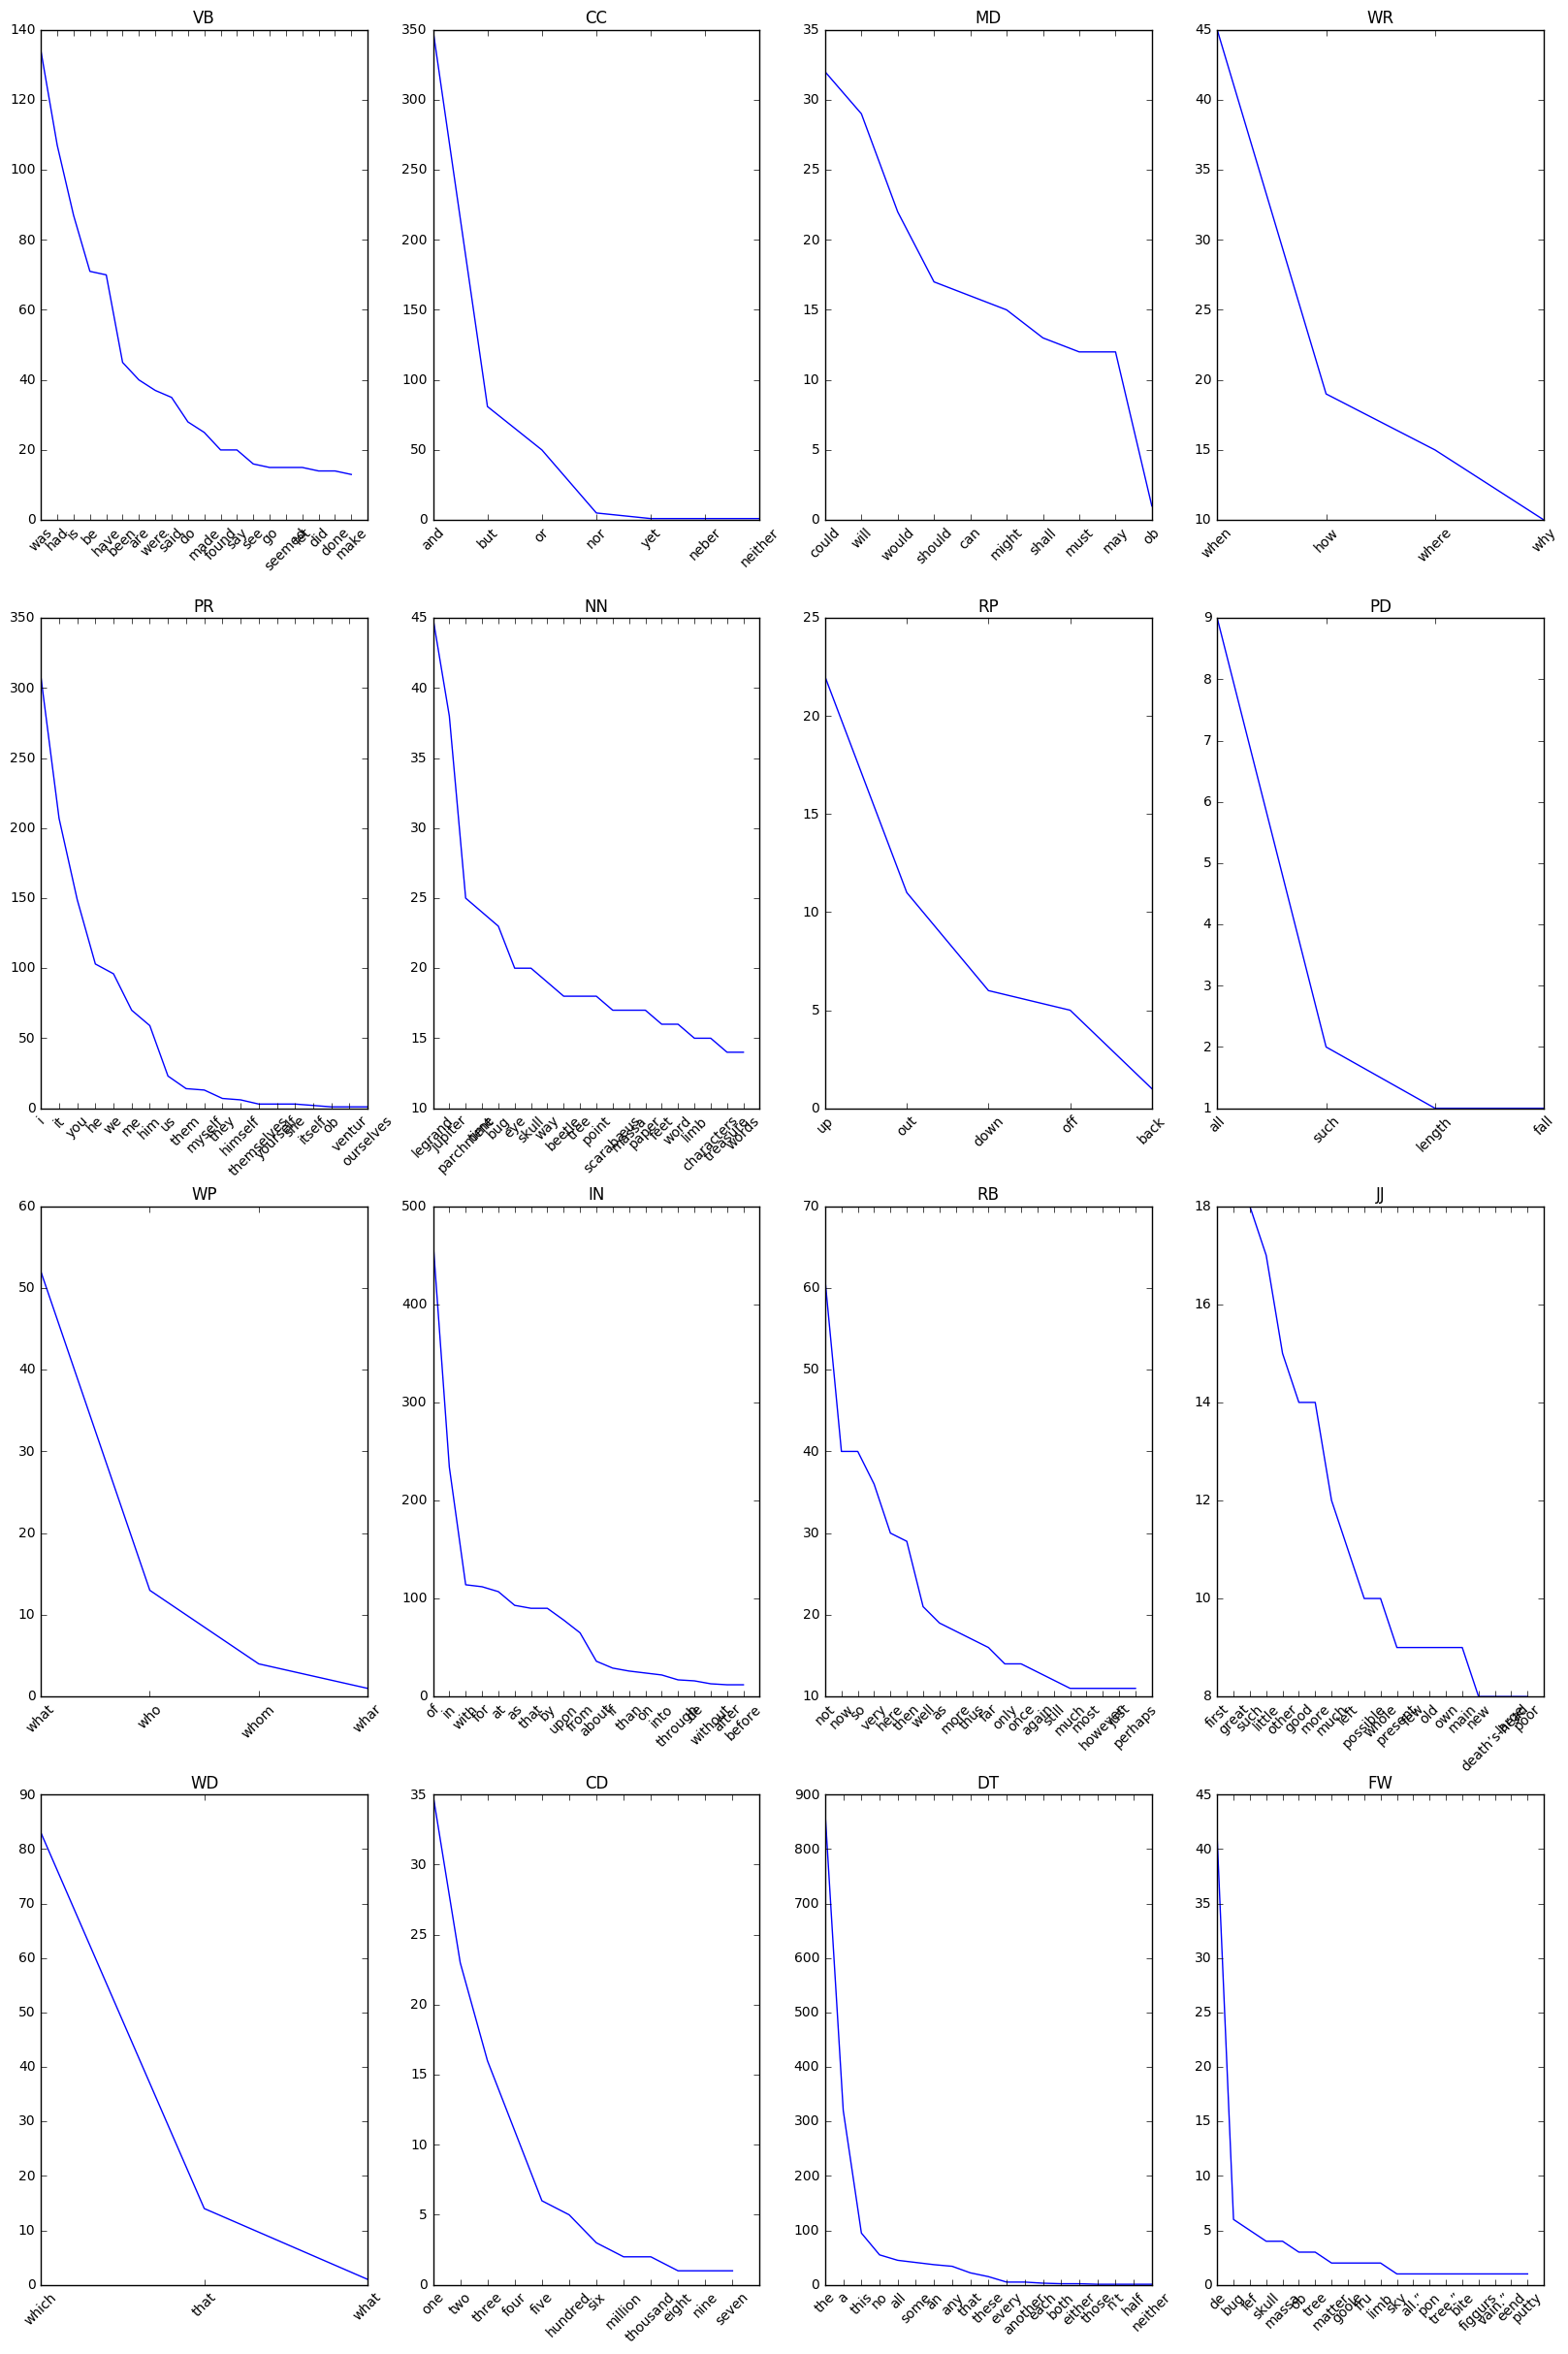

In [73]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(goldBugTagsGridRows, 4, figsize=(20,30))

for idx, currentpos in enumerate(goldBugTagsNormalizedAndFiltered):
    words = [word.lower() for word, pos in goldBugTaggedNormalized if pos == currentpos]
    freqs = nltk.FreqDist(words).most_common(20)
    
    plt.subplot(goldBugTagsGridRows, 4, (idx+1))
    plt.plot([count for token, count in freqs])
    plt.xticks(range(len(freqs)),[token for token, count in freqs], rotation=45)
    plt.title(currentpos)

In [76]:
for fileid in nltk.corpus.gutenberg.fileids():
    text = nltk.corpus.gutenberg.raw(fileid)
    length = len(text)
    print(fileid + ":", "{:,}".format(length))

austen-emma.txt: 887,071
austen-persuasion.txt: 466,292
austen-sense.txt: 673,022
bible-kjv.txt: 4,332,554
blake-poems.txt: 38,153
bryant-stories.txt: 249,439
burgess-busterbrown.txt: 84,663
carroll-alice.txt: 144,395
chesterton-ball.txt: 457,450
chesterton-brown.txt: 406,629
chesterton-thursday.txt: 320,525
edgeworth-parents.txt: 935,158
melville-moby_dick.txt: 1,242,990
milton-paradise.txt: 468,220
shakespeare-caesar.txt: 112,310
shakespeare-hamlet.txt: 162,881
shakespeare-macbeth.txt: 100,351
whitman-leaves.txt: 711,215


In [78]:
def get_percentage_pos(string,pos):
    tokens= nltk.word_tokenize(string)
    tagged= nltk.pos_tag(tokens)
    matching_tagged= [word for word,p in tagged if pos==p]
    return len(matching_tagged)/len(tagged)